In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the MNIST dataset and add noise to the images
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

**Noise is added to the original dataset randomly**

In [10]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

**Enncoder layers:**

The inputs variable represents the input images to the autoencoder, which are noisy images in the case of a denoising autoencoder. 

The first Conv2D layer applies 32 convolutional filters of size 3x3 to the input images, followed by a ReLU activation function and "same" padding to keep the spatial dimensions of the input and output the same.The output of this layer is then max pooled with a pool size of 2x2 and "same" padding.
 
The second Conv2D layer applies another 32 convolutional filters of size 3x3 to the output of the first layer, followed by a ReLU activation function and "same" padding. The output of this layer is again max pooled with a pool size of 2x2 and "same" padding.

The final output of the encoder is the compressed representation of the input, which is represented by the encoded variable.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

input_shape = (28, 28, 1)
# Define the model architecture
model = Sequential()

# Encoder Layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))


**Decoder layers:**

The decoder takes the compressed representation encoded as input and reconstructs the original, denoised image.

The first Conv2D layer applies 32 convolutional filters of size 3x3 to the compressed representation, followed by a ReLU activation function and "same" padding. 

The output of this layer is then upsampled with a scale factor of 2 using the UpSampling2D layer. 

The second Conv2D layer applies another 32 convolutional filters of size 3x3 to the upsampled output, followed by a ReLU activation function and "same" padding. The output of this layer is again upsampled with a scale factor of 2. 

Finally, the reconstructed image is produced using a Conv2D layer with a single filter of size 3x3 and a sigmoid activation function, which scales the output to the range of [0, 1].


In [12]:
# Decoder Layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

**Compile the model**

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

**Train the model**

In [15]:
# Compile the model and train it
model.fit(x_train_noisy, x_train,
          epochs=5,
          batch_size=128,
          shuffle=True,
          validation_data=(x_test_noisy, x_test))

Epoch 1/5
469/469 [==============================] - 209s 446ms/step - loss: 0.0823 - val_loss: 0.0783
Epoch 2/5
469/469 [==============================] - 202s 432ms/step - loss: 0.0776 - val_loss: 0.0759
Epoch 3/5
469/469 [==============================] - 202s 432ms/step - loss: 0.0756 - val_loss: 0.0742
Epoch 4/5
469/469 [==============================] - 203s 433ms/step - loss: 0.0744 - val_loss: 0.0733
Epoch 5/5
469/469 [==============================] - 202s 432ms/step - loss: 0.0736 - val_loss: 0.0727


In [16]:
# Get the denoised images
decoded_images = model.predict(x_test_noisy)

313/313 [==============================] - 8s 25ms/step


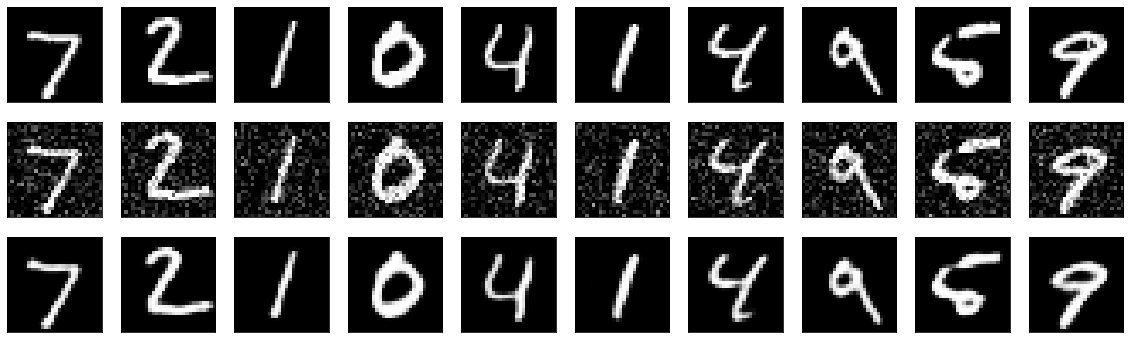

In [18]:
# Plot the original, noisy, and denoised images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Noisy images
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Denoised images
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()